# Moduel 15.02 Data Cleaning I: Variable Types

In [70]:
# importing pacakges
import pandas as pd
import numpy as np
from numpy import inf
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import re
from wordcloud import WordCloud
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [3]:
# extract info from database
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

youtube_df = pd.read_sql_query('select * from youtube',con=engine)

# no need for an open connection, 
# because you're only doing a single query
engine.dispose()

#print(youtube_df.info())
print(youtube_df.isnull().sum())
print(youtube_df.nunique()) # unique values in each column

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64
Rank             5000
Grade               6
Channel name     4993
Video Uploads    2286
Subscribers      4612
Video views      5000
dtype: int64


In [4]:
youtube_df.head() # shows more than 1 int

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


## Missing Values

In [5]:
# shows there are blanks with '--'
youtube_df[(youtube_df["Video Uploads"].str.strip() == "--") | (youtube_df["Subscribers"].str.strip() == "--")]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
17,18th,A+,Vlad and Nikita,53,--,1428274554
108,109th,A,BIGFUN,373,--,941376171
115,116th,A,Bee Kids Games - Children TV,740,--,414535723
142,143rd,A,ChiChi TV Siêu Nhân,421,--,2600394871
143,144th,A,MusicTalentNow,1487,--,3252752212
...,...,...,...,...,...,...
4941,"4,942nd",B+,GMTV,183,--,127080542
4948,"4,949th",B+,Keivon ToysReview,468,--,481568513
4956,"4,957th",B+,CLICKNEWS,2661,--,139940815
4961,"4,962nd",B+,ONE Championship,905,--,109836654


In [6]:
# Print all values that cannot be converted to float
for column_name in ["Video Uploads", "Subscribers"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in youtube_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Video Uploads
--
--
--
--
--
--
These are the problematic values for the variable: Subscribers
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
--

In [7]:
youtube_df.Grade.value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

In [8]:
# Replace `--` values with empty strings

for column_name in ["Video Uploads", "Subscribers"]:
    youtube_df[column_name] = youtube_df[column_name].apply(str.strip).replace("--", np.nan)
    youtube_df[column_name] = pd.to_numeric(youtube_df[column_name], downcast="float")

# convert blank cells to na
youtube_df["Grade"] = youtube_df["Grade"].apply(str.strip).replace("", np.nan)

In [10]:
# shows video uploads and subscribers are float now
# youtube_df.info()

print('count of nulls:')
print(youtube_df.isnull().sum())

print('\n')

print('proportion of null:')
print(youtube_df.isnull().sum()/youtube_df.isnull().count()*100)

count of nulls:
Rank               0
Grade              6
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64


proportion of null:
Rank             0.00
Grade            0.12
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64


In [11]:
# filling the missing values with some unharmful values

print('count of nulls:')
for column_name in ["Video Uploads", "Subscribers"]:
    youtube_df[column_name].fillna(youtube_df[column_name].mean(), inplace=True)

youtube_df.isnull().sum()*100/youtube_df.count()

Rank             0.000000
Grade            0.120144
Channel name     0.000000
Video Uploads    0.000000
Subscribers      0.000000
Video views      0.000000
dtype: float64

In [12]:
grade_list = youtube_df.Grade

for i in range(0, len(youtube_df.Grade)):
    if pd.isnull(youtube_df.Grade[i]):
        youtube_df.Grade[i] = youtube_df.Grade[i-1]
        
youtube_df["Grade"].unique()

array(['A++', 'A+', 'A', 'A-', 'B+'], dtype=object)

## Grouping Numbers to Categories

In [13]:
# This method returns group numbers 
# given video views
def categorize_video_views(views_num):
    if views_num >= 1000000000:
        return 1
    elif views_num >= 100000000:
        return 2
    else:
        return 3

# Use the pandas `apply()` method by calling the function above
youtube_df['views_group'] = youtube_df['Video views'].apply(categorize_video_views)

# Examine how many observations you have in each group
print(youtube_df.groupby("views_group")["Video views"].count())

views_group
1    1399
2    2846
3     755
Name: Video views, dtype: int64


## Outliers

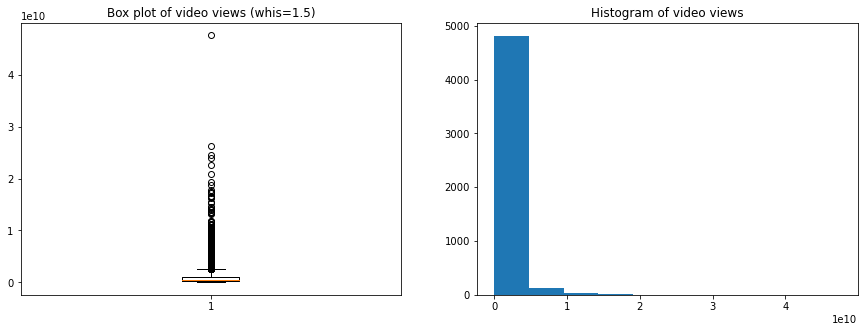

In [22]:
plt.figure(figsize = (15,5))

# box-plot
plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views (whis=1.5)")
# plt.show()

# histogram
plt.subplot(1,2,2)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")

plt.show()

### z-score

In [22]:
z_scores = zscore(youtube_df["Video views"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('\n')

The score threshold is: 1
The indices of the outliers:
The z
(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,   11,
         13,   14,   15,   16,   18,   19,   21,   22,   25,   26,   27,
         35,   37,   38,   39,   40,   41,   42,   43,   44,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   57,   58,   59,   61,
         62,   63,   64,   66,   67,   68,   70,   72,   74,   75,   77,
         78,   81,   82,   83,   84,   85,   87,   88,   91,   93,   95,
         98,   99,  105,  106,  111,  112,  113,  114,  116,  120,  121,
        122,  123,  125,  126,  127,  130,  131,  135,  137,  138,  143,
        145,  146,  147,  149,  151,  154,  155,  158,  165,  167,  170,
        171,  172,  174,  176,  182,  184,  187,  193,  198,  200,  201,
        208,  210,  212,  218,  224,  227,  228,  229,  241,  242,  244,
        245,  248,  249,  254,  256,  257,  260,  261,  264,  265,  266,
        268,  269,  270,  271,  273,  277,  282,  283,  284,  

### turkey's method

In [24]:
# NumPy's `percentile()` method returns the 
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds 
# to the third and the first quartiles.
q75, q25 = np.percentile(youtube_df["Video views"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((youtube_df["Video views"] > max_val) 
                      | (youtube_df["Video views"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 624
The score threshold is: 1.5
Number of outliers is: 475
The score threshold is: 2.0
Number of outliers is: 371
The score threshold is: 2.5
Number of outliers is: 296
The score threshold is: 3.0
Number of outliers is: 242
The score threshold is: 3.5
Number of outliers is: 209
The score threshold is: 4.0
Number of outliers is: 182
The score threshold is: 4.5
Number of outliers is: 151


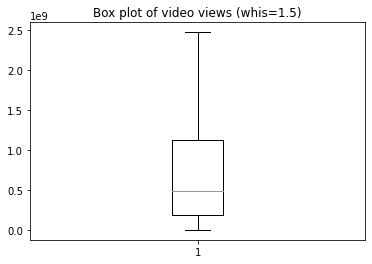

In [27]:
# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile. 
winsorized_views = winsorize(youtube_df["Video views"], (0, 0.10))

plt.boxplot(winsorized_views)
plt.title("Box plot of video views (whis=1.5)")
plt.show()

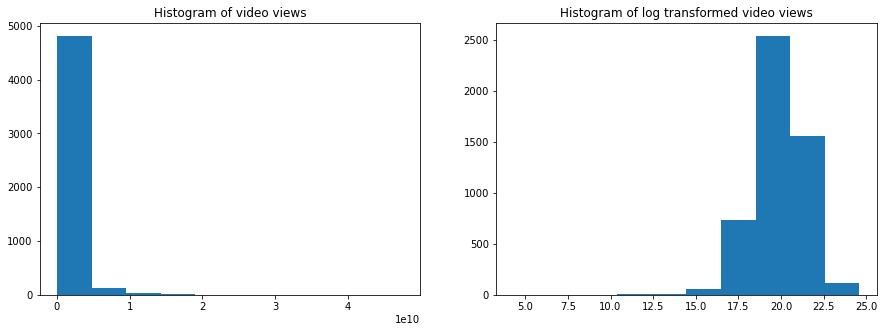

In [28]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")

plt.subplot(1,2,2)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of log transformed video views")
plt.show()

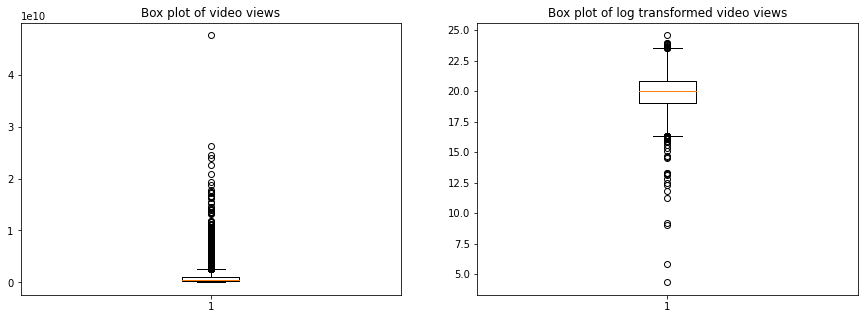

In [29]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views")

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube_df["Video views"]))
plt.title("Box plot of log transformed video views")
plt.show()

In [30]:
# Take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(youtube_df["Video views"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(youtube_df["Video views"]) > max_val) 
                      | (np.log(youtube_df["Video views"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 326
The score threshold is: 1.5
Number of outliers is: 58
The score threshold is: 2.0
Number of outliers is: 19
The score threshold is: 2.5
Number of outliers is: 14
The score threshold is: 3.0
Number of outliers is: 13
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 6
The score threshold is: 4.5
Number of outliers is: 4


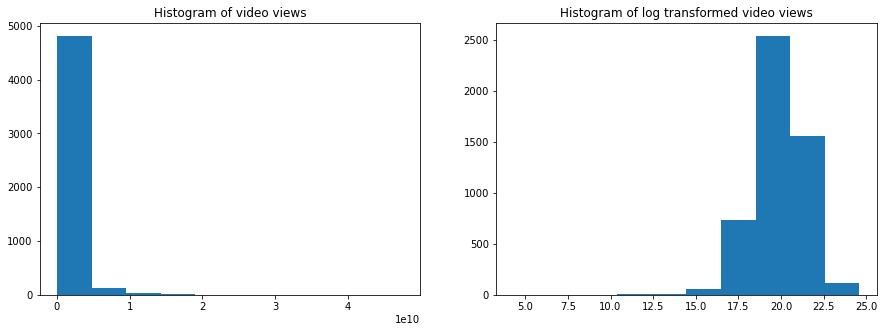

In [28]:
plt.figure(figsize = (15,5))

# not transformed
plt.subplot(1,2,1)

plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")

# log transformed
plt.subplot(1,2,2)

plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of log transformed video views")
plt.show()

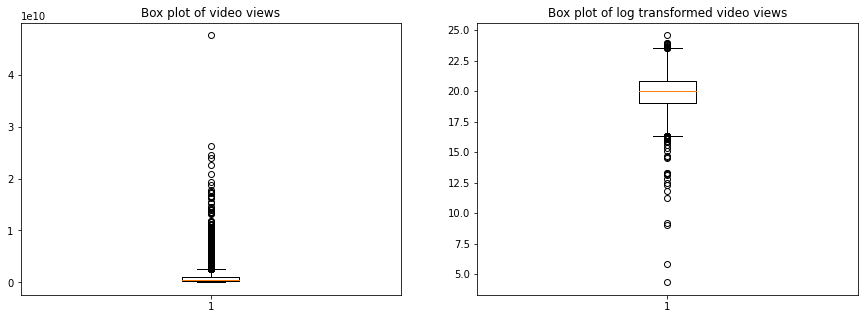

In [29]:
plt.figure(figsize = (15,5))

# not transformed

plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views")

# log transformed

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube_df["Video views"]))
plt.title("Box plot of log transformed video views")
plt.show()

In [30]:
# take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(youtube_df["Video views"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(youtube_df["Video views"]) > max_val) 
                      | (np.log(youtube_df["Video views"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 326
The score threshold is: 1.5
Number of outliers is: 58
The score threshold is: 2.0
Number of outliers is: 19
The score threshold is: 2.5
Number of outliers is: 14
The score threshold is: 3.0
Number of outliers is: 13
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 6
The score threshold is: 4.5
Number of outliers is: 4


In [44]:

# apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile.

for column_name in ['Video Uploads', 'Subscribers', 'Video views']:
    youtube_df['winsorized_' + re.sub('.* ', '', column_name.lower())] = winsorize(youtube_df[column_name], (0, 0.10))

## Data Exploration

In [48]:
# Get univariate statistics
youtube_df.describe()

,Video Uploads,Subscribers,Video views,views_group,winsorized_uploads,winsorized_subscribers,winsorized_views
count,5000.000000,5000.0,5.000000e+03,5000.000000,5000.000000,5000.000,5.000000e+03
mean,3859.463623,2620004.0,1.071449e+09,1.871200,1288.413818,2081596.625,7.828476e+08
std,17075.609375,3771402.5,2.003844e+09,0.643656,1779.181152,1781477.500,7.754301e+08
min,1.000000,301.0,7.500000e+01,1.000000,1.000000,301.000,7.500000e+01
25%,141.000000,666802.5,1.862329e+08,1.000000,141.000000,666802.500,1.862329e+08
50%,445.000000,1544402.0,4.820548e+08,2.000000,445.000000,1544402.000,4.820548e+08
75%,1511.500000,2723181.5,1.124368e+09,2.000000,1511.500000,2723181.500,1.124368e+09
max,422326.000000,65995312.0,4.754884e+10,3.000000,5653.000000,5895361.000,2.468241e+09


In [49]:
# descriptive statistics for just text-based variables
youtube_df.describe(include=['O'])

,Rank,Grade,Channel name
count,5000,5000,5000
unique,5000,5,4993
top,"4,437th",B+,Various Artists - Topic
freq,1,2960,2


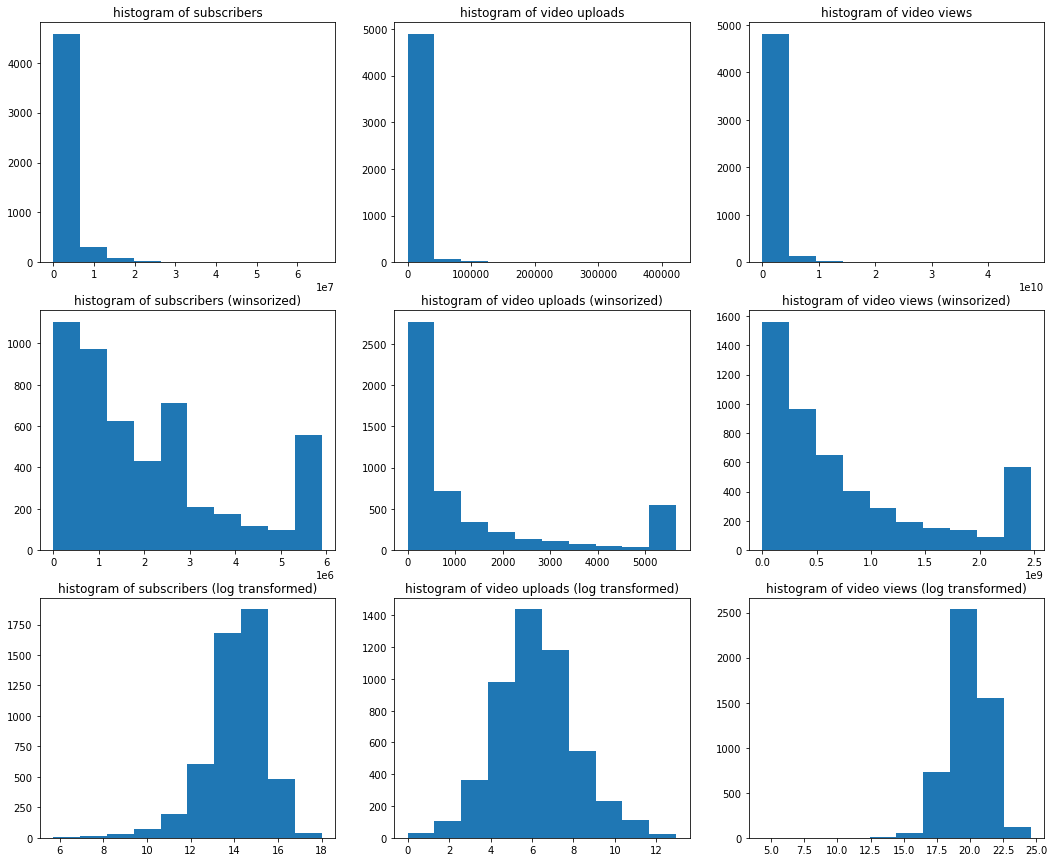

In [50]:
# Univariate visualization of continuous variables
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(youtube_df["Subscribers"])
plt.title("histogram of subscribers")

plt.subplot(3, 3, 2)
plt.hist(youtube_df["Video Uploads"])
plt.title("histogram of video uploads")

plt.subplot(3, 3, 3)
plt.hist(youtube_df["Video views"])
plt.title("histogram of video views")

# Histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(youtube_df["winsorized_subscribers"])
plt.title("histogram of subscribers (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(youtube_df["winsorized_uploads"])
plt.title("histogram of video uploads (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(youtube_df["winsorized_views"])
plt.title("histogram of video views (winsorized)")

# Histograms of the log-transformed data
plt.subplot(3, 3, 7)
plt.hist(np.log(youtube_df["Subscribers"]))
plt.title("histogram of subscribers (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(youtube_df["Video Uploads"]))
plt.title("histogram of video uploads (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("histogram of video views (log transformed)")


plt.show()

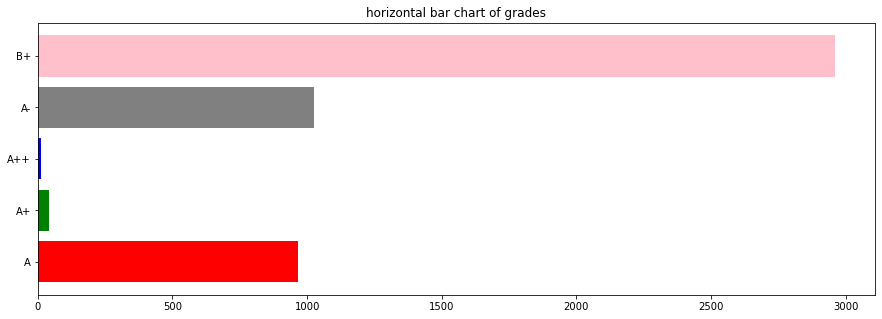

In [51]:
# Bar chart of grades
plt.figure(figsize=(15,5))
plt.barh(youtube_df.groupby("Grade")["Grade"].count().index, 
        youtube_df.groupby("Grade")["Grade"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of grades")

plt.show()

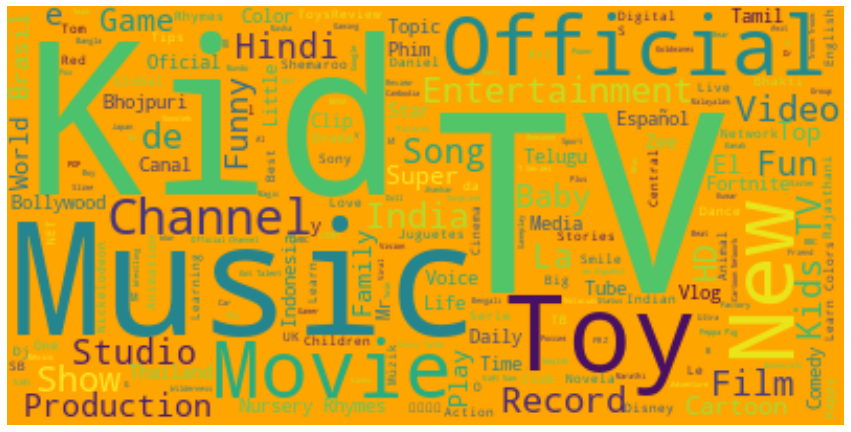

In [54]:
# Generate a word cloud image

wordcloud = WordCloud(background_color="orange").generate(" ".join(youtube_df["Channel name"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


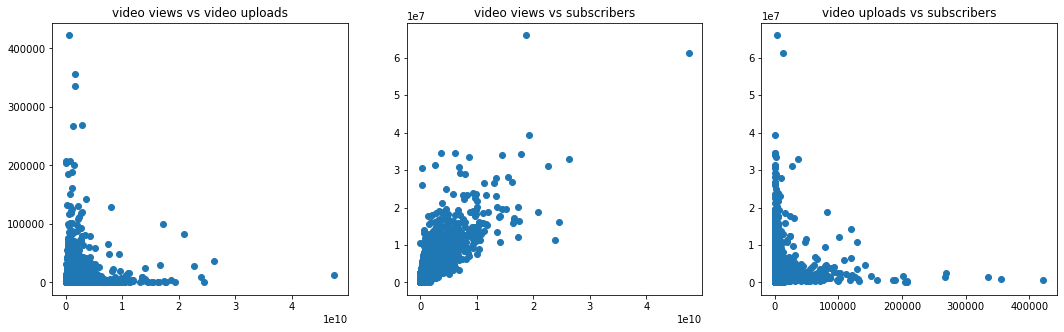

In [59]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(youtube_df["Video views"], youtube_df["Video Uploads"])
plt.title("video views vs video uploads")

plt.subplot(1,3,2)
plt.scatter(youtube_df["Video views"], youtube_df["Subscribers"])
plt.title("video views vs subscribers")

plt.subplot(1,3,3)
plt.scatter(youtube_df["Video Uploads"], youtube_df["Subscribers"])
plt.title("video uploads vs subscribers")

plt.show()

In [60]:
# one-hot encoding the `Grade` variable: 
pd.get_dummies(youtube_df["Grade"])

,A,A+,A++,A-,B+
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
4995,0,0,0,0,1
4996,0,0,0,0,1
4997,0,0,0,0,1
4998,0,0,0,0,1


In [61]:
# apend dummies to the YouTube DataFrame
youtube_df = pd.concat([youtube_df, pd.get_dummies(youtube_df["Grade"])], axis=1)
youtube_df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,views_group,winsorized_uploads,winsorized_subscribers,winsorized_views,A,A+,A++,A-,B+
0,1st,A++,Zee TV,82757.0,18752952.0,20869786591,1,5653.0,5895361.0,2468241402,0,0,1,0,0
1,2nd,A++,T-Series,12661.0,61196304.0,47548839843,1,5653.0,5895361.0,2468241402,0,0,1,0,0
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238252.0,9793305082,1,373.0,5895361.0,2468241402,0,0,1,0,0
3,4th,A++,SET India,27323.0,31180560.0,22675948293,1,5653.0,5895361.0,2468241402,0,0,1,0,0
4,5th,A++,WWE,36756.0,32852346.0,26273668433,1,5653.0,5895361.0,2468241402,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706.0,2072942.0,441202795,2,706.0,2072942.0,441202795,0,0,0,0,1
4996,"4,997th",B+,HI-TECH MUSIC LTD,797.0,1055091.0,377331722,2,797.0,1055091.0,377331722,0,0,0,0,1
4997,"4,998th",B+,Mastersaint,110.0,3265735.0,311758426,2,110.0,3265735.0,311758426,0,0,0,0,1
4998,"4,999th",B+,Bruce McIntosh,3475.0,32990.0,14563764,3,3475.0,32990.0,14563764,0,0,0,0,1


In [62]:
jb_stats = jarque_bera(np.log(youtube_df["Subscribers"]))
norm_stats = normaltest(np.log(youtube_df["Subscribers"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(youtube_df["Video Uploads"]))
norm_stats = normaltest(np.log(youtube_df["Video Uploads"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(youtube_df["Video views"]))
norm_stats = normaltest(np.log(youtube_df["Video views"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3650.18501143955 and p value is 0.0
Normality test statistics is 1168.7793574548339 and p value is 1.5950975481327862e-254
Jarque-Bera test statistics is 83.01330104290801 and p value is 0.0
Normality test statistics is 71.5114065304969 and p value is 2.9613884303178817e-16
Jarque-Bera test statistics is 7862.3171340522895 and p value is 0.0
Normality test statistics is 1180.823167194929 and p value is 3.8681846024387925e-257


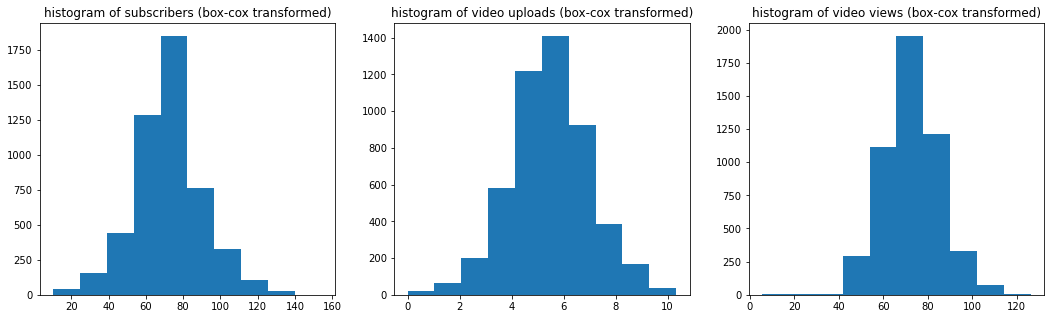

In [64]:
video_uploads_boxcox,_ = boxcox(youtube_df["Video Uploads"])
subscribers_boxcox,_ = boxcox(youtube_df["Subscribers"])
video_views_boxcox,_ = boxcox(youtube_df["Video views"])

plt.figure(figsize=(18,5))

# Histograms of the Box-Cox-transformed data
plt.subplot(1, 3, 1)
plt.hist(subscribers_boxcox)
plt.title("histogram of subscribers (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(video_uploads_boxcox)
plt.title("histogram of video uploads (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(video_views_boxcox)
plt.title("histogram of video views (box-cox transformed)")

plt.show()

In [65]:
jb_stats = jarque_bera(subscribers_boxcox)
norm_stats = normaltest(subscribers_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(video_uploads_boxcox)
norm_stats = normaltest(video_uploads_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(video_views_boxcox)
norm_stats = normaltest(video_views_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 112.35570323703146 and p value is 0.0
Normality test statistics is 64.42335185045322 and p value is 1.0248183493001413e-14
Jarque-Bera test statistics is 32.0043564508529 and p value is 1.1229031449122573e-07
Normality test statistics is 23.235963338446687 and p value is 9.002739219409114e-06
Jarque-Bera test statistics is 93.4064021228951 and p value is 0.0
Normality test statistics is 55.77146119242227 and p value is 7.751416591883903e-13


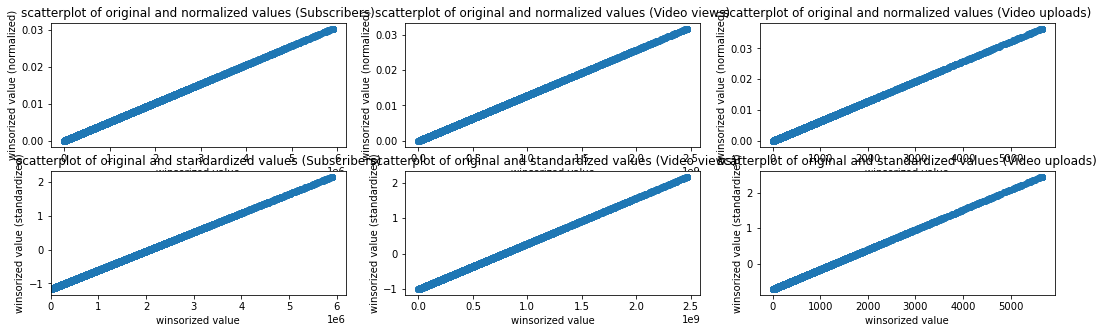

In [73]:
# Normalize the winsorized variables
youtube_df["norm_winsorized_subscribers"] = normalize(np.array(youtube_df["winsorized_subscribers"]).reshape(1,-1)).reshape(-1,1)
youtube_df["norm_winsorized_views"] = normalize(np.array(youtube_df["winsorized_views"]).reshape(1,-1)).reshape(-1,1)
youtube_df["norm_winsorized_uploads"] = normalize(np.array(youtube_df["winsorized_uploads"]).reshape(1,-1)).reshape(-1,1)
youtube_df["scaled_winsorized_subscribers"] = scale(youtube_df["winsorized_subscribers"])
youtube_df["scaled_winsorized_views"] = scale(youtube_df["winsorized_views"])
youtube_df["scaled_winsorized_uploads"] = scale(youtube_df["winsorized_uploads"])



plt.figure(figsize=(18,5))

plt.subplot(2,3,1)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_subscribers"], youtube_df["norm_winsorized_subscribers"])
plt.title("scatterplot of original and normalized values (Subscribers)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(2,3,2)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_views"], youtube_df["norm_winsorized_views"])
plt.title("scatterplot of original and normalized values (Video views)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(2,3,3)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_uploads"], youtube_df["norm_winsorized_uploads"])
plt.title("scatterplot of original and normalized values (Video uploads)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(2,3,4)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_subscribers"], youtube_df["scaled_winsorized_subscribers"])
plt.title("scatterplot of original and standardized values (Subscribers)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")
plt.xlim(0.00000001)

plt.subplot(2,3,5)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_views"], youtube_df["scaled_winsorized_views"])
plt.title("scatterplot of original and standardized values (Video views)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.subplot(2,3,6)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_uploads"], youtube_df["scaled_winsorized_uploads"])
plt.title("scatterplot of original and standardized values (Video uploads)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.show()